In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Datakit included

The notebook is supplied with two files `cost_dE_wide_v2019.csv` and `cost_dE_wide_v2021.csv` which have been generated by PyPSA-Eur workflow after applying the fixes of https://github.com/PyPSA/pypsa-eur/pull/800, modified by a way described bellow in `Way to reproduce data` and using respectivelly the old and the versions of the hotmaps data.

## Way to reproduce data
* **replace**
```python
l_strength = ["0.07", "0.075", "0.08", "0.1", "0.15", "0.22", "0.24", "0.26"]
```
with
```python
l_strength = list(map(str, np.arange(0.01, 0.35, 0.01).round(2).tolist()))
```
* **add an interim output**
```python
cost_dE.to_csv("cost_dE_wide.csv")
```
after
```python
cost_dE = pd.concat([cost_dE, tot]).unstack().stack(future_stack=True)
```

## Looking into the data

In [2]:
new_hotmaps_path = "cost_dE_wide_v2021.csv"
n = pd.read_csv(new_hotmaps_path, index_col=[0,1], header=[0,1])

In [3]:
n

cost                                                  \
                      0.01        0.02        0.03        0.04        0.05   
AL residential   72.980615   76.761451   79.647191   82.742165   86.545909   
   services      52.974728   55.116013   57.257298   59.398582   61.539867   
   tot           67.122527   70.423272   73.091023   75.906739   79.223685   
AT residential  145.299068  151.102424  156.905781  162.709137  168.512493   
   services      95.049334   98.996828  102.944323  106.891818  110.839313   
...                    ...         ...         ...         ...         ...   
SI services      70.648774   73.574046   76.499318   79.424590   82.349862   
   tot           88.239835   91.816692   95.393549   98.970406  102.547263   
SK residential   74.930659   77.942975   80.955291   83.967608   86.979924   
   services      55.009501   57.303941   59.598381   61.892821   64.187260   
   tot           69.604835   72.425230   75.245626   78.066021   80.886417   

                                                                            \
                      0.06        0.07        0.08        0.09         0.1   
AL residential   89.735956   93.027094   95.951178   99.203540  103.115827   
   services      63.681152   66.688898   70.196456   72.383393   75.998638   
   tot           82.106635   85.314790   88.409726   91.350112   95.175420   
AT residential  174.315849  180.119206  185.922562  191.725918  197.529275   
   services     114.786808  118.734302  122.681797  136.148630  144.885804   
...                    ...         ...         ...         ...         ...   
SI services      85.275134   88.200406   91.125678   94.050950   96.976222   
   tot          106.124120  109.700976  113.277833  116.854690  120.431547   
SK residential   89.992240  102.036340  105.237180  111.162063  114.417485   
   services      66.481700   68.776140   71.070580   73.365020   83.116566   
   tot           83.706812   93.144388   96.102907  101.057209  106.049338   

                ...        dE                                          \
                ...      0.25      0.26      0.27      0.28      0.29   
AL residential  ...  0.129155  0.127279  0.125534  0.123906  0.122385   
   services     ...  0.123296  0.121664  0.120145  0.118729  0.117404   
   tot          ...  0.127439  0.125635  0.123956  0.122390  0.120926   
AT residential  ...  0.300395  0.297640  0.295063  0.292645  0.290373   
   services     ...  0.370862  0.368161  0.365630  0.363256  0.361023   
...             ...       ...       ...       ...       ...       ...   
SI services     ...  0.301534  0.298910  0.296438  0.294107  0.291904   
   tot          ...  0.261964  0.259352  0.256898  0.254588  0.252409   
SK residential  ...  0.182422  0.180387  0.178489  0.176716  0.175056   
   services     ...  0.190547  0.188594  0.186773  0.185073  0.183480   
   tot          ...  0.184594  0.182581  0.180704  0.178950  0.177308   

                                                                  
                     0.3      0.31      0.32      0.33      0.34  
AL residential  0.120959  0.119621  0.118362  0.117176  0.116057  
   services     0.116163  0.114998  0.113902  0.112869  0.111894  
   tot          0.119555  0.118267  0.117056  0.115915  0.114838  
AT residential  0.288233  0.286214  0.284306  0.282501  0.280790  
   services     0.358919  0.356934  0.355058  0.353281  0.351597  
...                  ...       ...       ...       ...       ...  
SI services     0.289819  0.287843  0.285967  0.284184  0.282486  
   tot          0.250350  0.248401  0.246554  0.244801  0.243135  
SK residential  0.173498  0.172033  0.170653  0.169351  0.168121  
   services     0.181985  0.180579  0.179255  0.178006  0.176825  
   tot          0.175767  0.174318  0.172953  0.171665  0.170448  

[99 rows x 68 columns]

### Assuming a pre-defined insulation thickness as definition for moderate

In [4]:
n2 = n[[("cost", i) for i in ["0.07"]]]

In [5]:
n3 = n[[("dE", i) for i in ["0.07"]]]

In [6]:
cost_per_saving = n2["cost"] / (
    1 - n3["dE"]
)  # .diff(axis=1).dropna(axis=1)

moderate_min = cost_per_saving.idxmin(axis=1)
moderate_dE_cost = pd.concat(
    [n.loc[i].xs(moderate_min.loc[i], level=1) for i in moderate_min.index],
    axis=1,
).T
moderate_dE_cost.columns = pd.MultiIndex.from_product(
    [moderate_dE_cost.columns, ["moderate"]]
)

In [7]:
moderate_min.unique()

array(['0.07'], dtype=object)

In [8]:
cost_per_saving.idxmin(axis=1).unique()

array(['0.07'], dtype=object)

### Actual definition of moderate scenario

In [9]:
cost_per_dE = n["cost"]/(1 - n["dE"])

In [10]:
cost_per_dE.idxmin(axis=1)

AL  residential    0.07
    services       0.07
    tot            0.07
AT  residential    0.09
    services       0.18
                   ... 
SI  services       0.18
    tot            0.18
SK  residential    0.07
    services       0.07
    tot            0.07
Length: 99, dtype: object

In [11]:
cost_per_dE.idxmin(axis=1).unique()

array(['0.07', '0.09', '0.18', '0.1', '0.08', '0.19', '0.06', '0.05',
       '0.11'], dtype=object)

### Cost curves

BG 44.32999030656466 66.49791344424608 44.32999030656466 66.49791344424608 13.94457157888746 120.4132043389108
DE 59.39019152401508 142.8400188119439 32.52101738025742 226.4069040326447 26.09465269594864 274.32274408400787
PL 51.627488741268934 77.17721305013873 26.78208439550967 111.76422893675672 20.17938194375139 136.91136143360745
SE 75.9281027783425 151.15444854536574 46.17349838193846 251.30419436080743 41.255384169812956 298.5114486335319


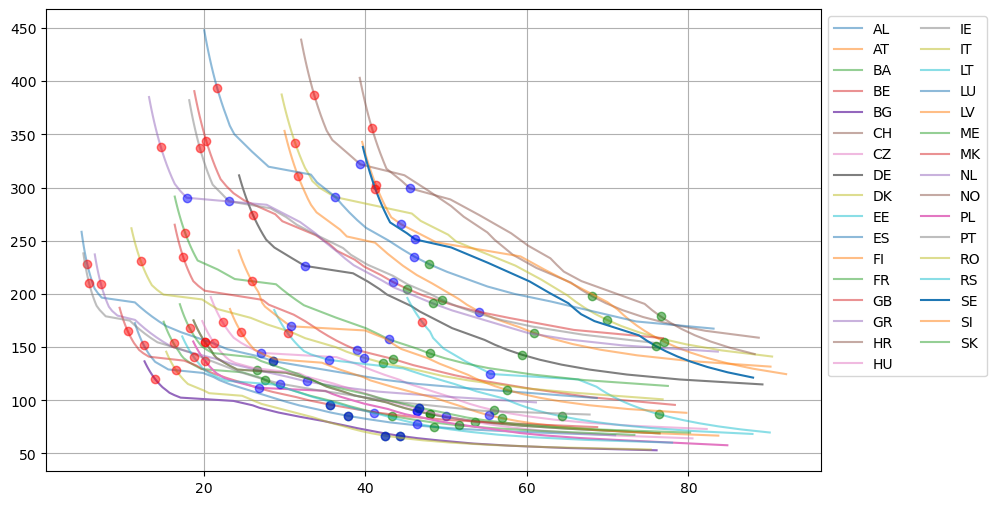

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

for country in n.index.get_level_values(0)[0::3]:
    #sec = "residential"
    sec = "tot"

    l_min_cost = cost_per_dE.loc[country].loc[sec].idxmin()

    x = n.loc[country]["dE"].loc[sec].values * 100
    y = n.loc[country]["cost"].loc[sec].values

    x_moderate_7cm = n.loc[country].loc[sec].loc["dE"].loc["0.07"] * 100
    y_moderate_7cm = n.loc[country].loc[sec].loc["cost"].loc["0.07"]

    x_moderate_min_cost = n.loc[country].loc[sec].loc["dE"].loc[l_min_cost] * 100
    y_moderate_min_cost = n.loc[country].loc[sec].loc["cost"].loc[l_min_cost]        

    x_ambitious = n.loc[country].loc[sec].loc["dE"].loc["0.26"] * 100
    y_ambitious = n.loc[country].loc[sec].loc["cost"].loc["0.26"]

    if country in ["PL", "DE", "BG", "SE"]:
        alpha=1
        print(country, 
            x_moderate_7cm, y_moderate_7cm,
            x_moderate_min_cost, y_moderate_min_cost,
            x_ambitious, y_ambitious
        )
    else: alpha=.5
    ax.plot(x, y, alpha=alpha, label=country)
    ax.plot(x_moderate_7cm, y_moderate_7cm, alpha=.5, marker="o", color="green")
    ax.plot(x_moderate_min_cost, y_moderate_min_cost, alpha=.5, marker="o", color="blue")    
    ax.plot(x_ambitious, y_ambitious, alpha=.5, marker="o", color="red")

ax.legend(ncol=2, bbox_to_anchor=[1,1])
ax.grid()
#plt.savefig(f"costcurves_{sec}.png", bbox_inches="tight")
#plt.show()

In [13]:
cost_per_dE

0.01        0.02        0.03        0.04        0.05  \
AL residential   257.134382  186.783365  165.046582  155.532766  150.461099   
   services      172.323810  131.878054  118.776658  113.222374  110.845960   
   tot           230.875237  170.514310  151.508144  143.265436  139.149534   
AT residential  1202.339990  657.346535  526.010204  470.348585  441.932294   
   services     2478.468405  854.556976  605.900076  508.912187  459.643092   
...                     ...         ...         ...         ...         ...   
SI services      378.799580  309.377674  278.256435  261.664441  252.221337   
   tot           435.514341  333.683908  295.163227  276.317156  266.250795   
SK residential   371.476224  249.886029  213.764215  198.058805  190.425601   
   services      293.063101  197.741768  168.902874  156.306003  150.174915   
   tot           351.599432  236.683909  202.381857  187.445851  180.180212   

                      0.06        0.07        0.08        0.09         0.1  \
AL residential  148.969513  148.442670  149.113244  150.041196  150.524763   
   services     110.113825  109.790513  109.809300  111.047536  112.931718   
   tot          137.916993  137.372931  137.657821  138.737827  139.654836   
AT residential  426.446020  418.130764  414.215589  413.199341  414.196718   
   services     431.509353  414.595942  404.357631  364.726995  352.918303   
...                    ...         ...         ...         ...         ...   
SI services     246.852461  244.037881  242.935951  243.041183  244.030824   
   tot          260.901642  258.395112  257.741186  258.365518  259.910972   
SK residential  186.816257  183.569782  183.743796  183.607879  185.182924   
   services     147.275926  146.226319  146.334804  147.216988  149.988018   
   tot          176.740928  174.759628  174.903778  175.202283  176.504690   

                ...        0.25        0.26        0.27        0.28  \
AL residential  ...  184.034870  186.816055  189.613617  192.425833   
   services     ...  140.867423  142.944669  145.032895  147.130952   
   tot          ...  171.334630  173.911369  176.502783  179.107330   
AT residential  ...  473.033082  479.440905  485.920255  492.463673   
   services     ...  377.624731  382.257687  386.955768  391.712232   
...             ...         ...         ...         ...         ...   
SI services     ...  251.220625  254.452702  257.716751  261.009703   
   tot          ...  282.915293  286.747148  290.613661  294.511412   
SK residential  ...  213.796919  216.941222  220.106946  223.291852   
   services     ...  170.592728  173.009880  175.444000  177.893316   
   tot          ...  202.330806  205.282787  208.254981  211.245275   

                      0.29         0.3        0.31        0.32        0.33  \
AL residential  195.251209  198.088452  200.936429  203.794149  206.660738   
   services     149.237845  151.352708  153.474787  155.603417  157.738015   
   tot          181.723675  184.350658  186.987267  189.632614  192.285916   
AT residential  499.064705  505.717741  512.417878  519.160811  525.942747   
   services     396.521239  401.377703  406.277175  411.215745  416.189966   
...                    ...         ...         ...         ...         ...   
SI services     264.328870  267.671890  271.036676  274.421382  277.824362   
   tot          298.437419  302.389071  306.364071  310.360388  314.376225   
SK residential  226.494000  229.711705  232.943494  236.188076  239.444310   
   services     180.356295  182.831603  185.318075  187.814687  190.320539   
   tot          214.251839  217.273085  220.307623  223.354233  226.411842   

                      0.34  
AL residential  209.535423  
   services     159.878062  
   tot          194.946482  
AT residential  532.760332  
   services     421.196782  
...                    ...  
SI services     281.244151  
   tot          318.409979  
SK residential  242.711189  
   services     192.834833  
   tot          229.479498  

In [14]:
cost_per_dE.idxmin(axis=1).unique()

array(['0.07', '0.09', '0.18', '0.1', '0.08', '0.19', '0.06', '0.05',
       '0.11'], dtype=object)

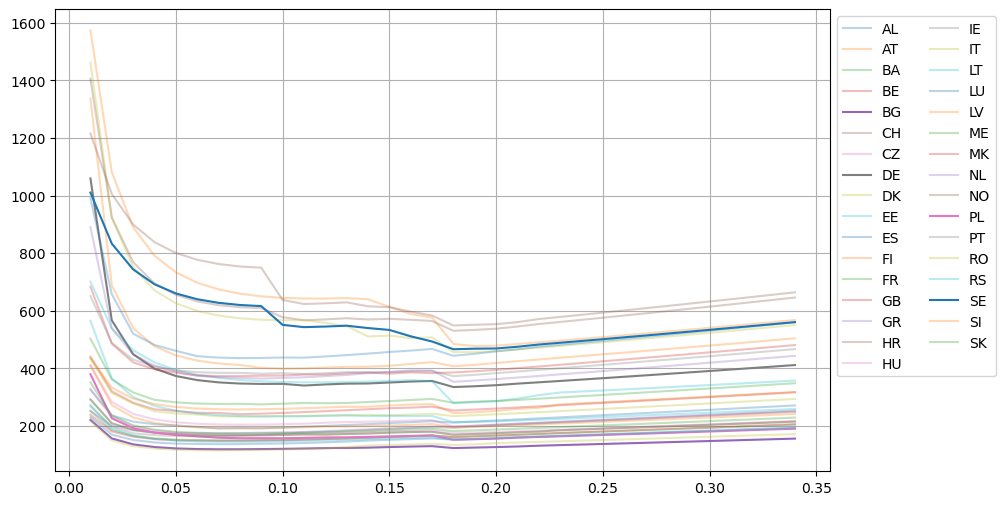

In [15]:
alpha = 0.75

fig, ax = plt.subplots(figsize=(10,6))

for country in cost_per_dE.index.get_level_values(0)[0::3]:
    #sec = "residential"
    sec = "tot"
    x = cost_per_dE.loc[country].loc[sec].index.astype(float)
    y = cost_per_dE.loc[country].loc[sec].values

    if country in ["PL", "DE", "BG", "SE"]:
        alpha=1
    #    print(country, x1, y1, x2, y2)
    else: alpha=.3
    ax.plot(x, y, alpha=alpha, label=country)

ax.legend(ncol=2, bbox_to_anchor=[1,1])
ax.grid()

#plt.savefig(f"costcurves_{sec}.png", bbox_inches="tight")
#plt.show()